# Retail Sales EDA in Python

This project uses the Retail Sales Dataset, a fictional but realistic collection of sales transactions.
The dataset contains important retail attributes:
Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, and Total Amount.

In this analysis, I focus on answering three key questions:

1. Customer Demographics & Spending — How does Age and Gender relate to total purchases?

2. Product Category Preferences — What’s the top product category for each age and gender group?

3. Time-based Spending Trends — How does daily and monthly spending vary across categories, customers, and gender?

# Import Libraries and Load Data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('C:/Users/mebrh/OneDrive/Desktop/Retail-Sales-EDA-in-Python-main/retail_sales_dataset.csv')

# Keep a copy for analysis
df = data.copy()
df.head(10)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


# Data Cleaning
Since this dataset contains no missing values, I will verify the data quality by examining unique values in each column and detecting any potential outliers.# Data Cleaning

In [8]:
df.info()  # 1000 rows and 9 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
# Date column is an object. Convert to datetime dtype to enable Date specific analyses
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [11]:
# Check for missing values
df.isnull().sum()  # There are No missing values

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [12]:
# Check for unique values in all columns
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

The output reveals:

* 1000 unique Transaction IDs and 1000 distinct Customer IDs.

* Only 345 unique dates exist, indicating multiple customers made purchases on the same days.

* Product categories are limited to Beauty, Clothing, and Electronics.

In [13]:
df.describe() # descriptive statistics

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


# Analysis 1 — Spending by Age & Gender

We want to see how spending patterns differ across age groups and genders.

In [14]:
# Group by Age and Gender, calculate Total Spending
age_gender_grouped = df.groupby(["Age", "Gender"])["Total Amount"].sum().unstack()

print(age_gender_grouped.to_string())

Gender  Female  Male
Age                 
18        7940  3275
19        7335  7535
20        5175  3470
21        5400  7185
22        5425  8275
23        2895  5325
24        1750  3665
25        3550  6350
26       10375  3605
27        4280  5105
28        5400  3270
29        4000  2570
30        6285  3505
31        2020  8200
32        1850  3700
33        2040  4200
34       12050  4735
35        6815  4475
36        3080  6025
37        5730  5920
38        6020  5080
39        3355  1240
40        7630  1785
41        1195  4455
42        5290  3210
43       10260  7710
44        3590  3970
45         585  5740
46        5380  7710
47        6315  6190
48        5410  1830
49        2650  2460
50        4300  5545
51        7270  8795
52        4270  2770
53        4890  4620
54        5755  4750
55        7070  2710
56        6025  3415
57        3630  5660
58        3680  3715
59        3785  5685
60        7660  3930
61        2840  3890
62        3060  5060
63        120

# Insights From First Analysis 

The first analysis examines spending patterns across age and gender demographics. Notably, 18-year-old females demonstrate higher aggregate spending than their male counterparts, while the trend reverses for 22-year-olds. These patterns are visually represented in the accompanying barplot.


<Figure size 2000x800 with 0 Axes>

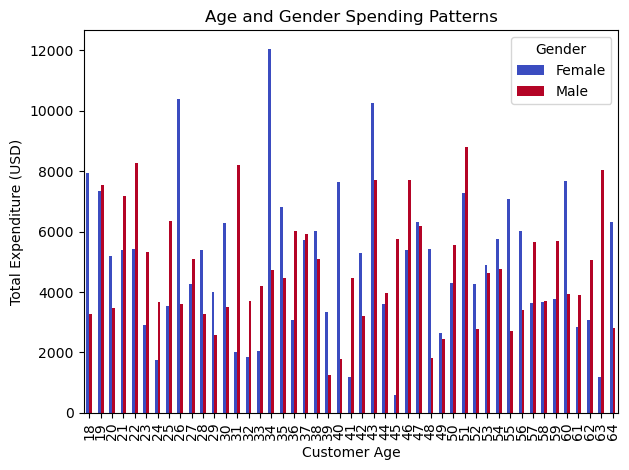

In [15]:
# Create a comparative bar plot of spending by age and gender
plt.figure(figsize=(20, 8))  # Set large figure size for clarity
age_gender_grouped.plot(kind='bar', 
                       stacked=False,  # Side-by-side bars
                       colormap='coolwarm')  # Gender-differentiated colors
plt.xlabel("Customer Age")
plt.ylabel("Total Expenditure (USD)")
plt.title("Age and Gender Spending Patterns")
plt.legend(title="Gender", loc='upper right')
plt.tight_layout()  # Prevent label overlap
plt.show()

# Analysis 2: Top Product Category by Age & Gender: 
We now break spending down by product category for each demographic group.

In [16]:
# Group by Age and Gender, Product categories
age_gender_category_grouped = df.groupby(["Age", "Gender", "Product Category"])["Total Amount"].sum().unstack(level=1)

print(age_gender_category_grouped.to_string())

Gender                Female    Male
Age Product Category                
18  Beauty            3195.0  1765.0
    Clothing          2575.0  1510.0
    Electronics       2170.0     NaN
19  Beauty            2225.0  2140.0
    Clothing          1200.0  1530.0
    Electronics       3910.0  3865.0
20  Beauty             365.0  2160.0
    Clothing            80.0   360.0
    Electronics       4730.0   950.0
21  Beauty            3300.0  4700.0
    Clothing          1200.0  1885.0
    Electronics        900.0   600.0
22  Beauty            1300.0  4230.0
    Clothing          3275.0  2075.0
    Electronics        850.0  1970.0
23  Beauty             475.0   165.0
    Clothing          1270.0  3050.0
    Electronics       1150.0  2110.0
24  Beauty            1575.0  1310.0
    Clothing            25.0  2125.0
    Electronics        150.0   230.0
25  Beauty            1000.0  1375.0
    Clothing          2200.0  2150.0
    Electronics        350.0  2825.0
26  Beauty            1715.0     NaN
 

# Key Takeaways from Second Analysis

This analysis uncovers customer purchasing trends across Age, Gender, and Product Category:

* Age-Based Trends: Spending preferences shift with age for specific product categories.

* Gender Variations: Clear disparities exist in how different genders allocate spending across categories.

Practical Application:

For real-world retail datasets, these insights enable businesses to:

✔ Sharpen marketing strategies by targeting high-propensity demographics.
✔ Optimize product promotions for age-gender groups with the highest spend affinity.

# Analysis 3: Monthly Trends 

The Total Daily and Monthly Spending are grouped by the ***Most bought Product Category***, ***Number of Customers*** and ***Gender***

# Total Daily Spending

**Uncomment** the code below to get the Total Daily Spending. The output consists of **345 different Dates**

In [17]:
# # Group by day
# daily_transactions = df.groupby('Date')

# # Analyze data for each day
# for day, group in daily_transactions:
#   # Most bought Product Category 
#   most_bought_product_category = group['Product Category'].mode().iloc[0]

#   # Number of Customers (unique customer IDs)
#   num_customers = group['Customer ID'].nunique()
    
#   # Gender of Customers
#   gender_counts = group['Gender'].value_counts()

#   # Print results for the day
#   print(f"Date: {day}")
#   print(f"  Most bought Product Category: {most_bought_product_category}")
#   print(f"  Number of Customers: {num_customers}")
  
#   # Access and print Gender counts
#   if 'Male' in gender_counts:
#     print(f"    Male Customers: {gender_counts['Male']}")
#   if 'Female' in gender_counts:
#     print(f"    Female Customers: {gender_counts['Female']}")
    
#   # Total spending per Day
#   total_spending = group['Total Amount'].sum()
    
#   print(f"  Total spending: {total_spending:.2f}")
#   print()  # Add a blank line between days

# Total Monthly Spending

In [18]:
import pandas as pd

# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Group by month (now that we have proper datetime)
monthly_transactions = df.groupby(df['Date'].dt.month)

def analyze_month(group):
    """Enhanced monthly transaction analysis with error handling"""
    try:
        analysis = {
            'Month': group.name,
            'Top Category': group['Product Category'].mode().iloc[0],
            'Unique Customers': group['Customer ID'].nunique(),
            'Gender Counts': group['Gender'].value_counts().to_dict(),
            'Total Revenue': group['Total Amount'].sum(),
            'Avg Transaction': group['Total Amount'].mean()
        }
        
        # Format output
        print(f"\nMonth {analysis['Month']} Analysis:")
        print(f"• Most Popular: {analysis['Top Category']}")
        print(f"• Customers: {analysis['Unique Customers']}")
        print("• Gender Breakdown:")
        for gender, count in analysis['Gender Counts'].items():
            print(f"  - {gender}: {count}")
        print(f"• Revenue: ${analysis['Total Revenue']:,.2f}")
        print(f"• Avg Spend: ${analysis['Avg Transaction']:,.2f}")
        
    except Exception as e:
        print(f"Error analyzing month {group.name}: {str(e)}")

# Apply analysis
monthly_transactions.apply(analyze_month)


Month 1 Analysis:
• Most Popular: Beauty
• Customers: 78
• Gender Breakdown:
  - Female: 40
  - Male: 38
• Revenue: $36,980.00
• Avg Spend: $474.10

Month 2 Analysis:
• Most Popular: Clothing
• Customers: 85
• Gender Breakdown:
  - Male: 49
  - Female: 36
• Revenue: $44,060.00
• Avg Spend: $518.35

Month 3 Analysis:
• Most Popular: Clothing
• Customers: 73
• Gender Breakdown:
  - Female: 41
  - Male: 32
• Revenue: $28,990.00
• Avg Spend: $397.12

Month 4 Analysis:
• Most Popular: Clothing
• Customers: 86
• Gender Breakdown:
  - Female: 50
  - Male: 36
• Revenue: $33,870.00
• Avg Spend: $393.84

Month 5 Analysis:
• Most Popular: Electronics
• Customers: 105
• Gender Breakdown:
  - Male: 60
  - Female: 45
• Revenue: $53,150.00
• Avg Spend: $506.19

Month 6 Analysis:
• Most Popular: Clothing
• Customers: 77
• Gender Breakdown:
  - Female: 39
  - Male: 38
• Revenue: $36,715.00
• Avg Spend: $476.82

Month 7 Analysis:
• Most Popular: Beauty
• Customers: 72
• Gender Breakdown:
  - Female: 37

""


# Insights from Analysis 3 

Analysis 3 examines Customer Spending Trends throughout the Year, segmented by Month, with focus on:

* Most Popular Product Category: Dominant category by customer purchases each month
* Number of Customers: Unique customer counts revealing shopping frequency patterns
* Gender Distribution: Male vs Female purchasing participation
* Total Spending: Aggregate revenue generation across all categories

The Findings:

1. Spending Fluctuations

* Peak Revenue: May (53,150) outperformed other months by 42 percent  vs average.
* owest Revenue: September (23,620) suggests seasonal slowdown
* Q4Surge: Consistent 35K+ revenue from October-December

2. Category Preferences

* Electronics Dominance: 8-month streak (May, August-December) as top  category
* Beauty Peaks: January (post-holiday recovery) and July (summer prep)
* Clothing Demand: February-April (spring season influence)

3. Customer Traffic

* Highest Footfall: May (105 customers) correlated with highest revenue
* Lowest Engagement: September (65 customers) needs intervention
* Stable Base: 70-90 customers/month typical range

4. Gender Dynamics

* Female Majority: Led purchases in 7/12 months (notable in April: 50F vs 36M)
* Male Surges: Outpaced females in Electronics-heavy months (May, October)
* Balanced Months: November showed perfect gender parity (39M vs 39F)

**Actionable Insights**

Once again, in a Real-life dataset the findings can help with:

* Promotions and Marketing: Understanding popular categories by month can help tailor promotions and marketing campaigns to target the right products at the right time.
* Inventory Management: Analyzing monthly sales trends can inform inventory management strategies, ensuring you have adequate stock of popular categories during peak demand months.
* Customer Acquisition: Months with lower customer traffic might be good times to implement customer acquisition campaigns to attract new buyers.

# Total Monthly Spending Trend by Gender

Month: 1
  Male Spending: 12255.00
  Female Spending: 24725.00

Month: 2
  Male Spending: 29665.00
  Female Spending: 14395.00

Month: 3
  Male Spending: 15670.00
  Female Spending: 13320.00

Month: 4
  Male Spending: 16570.00
  Female Spending: 17300.00

Month: 5
  Male Spending: 29220.00
  Female Spending: 23930.00

Month: 6
  Male Spending: 19840.00
  Female Spending: 16875.00

Month: 7
  Male Spending: 18580.00
  Female Spending: 16885.00

Month: 8
  Male Spending: 14880.00
  Female Spending: 22080.00

Month: 9
  Male Spending: 7085.00
  Female Spending: 16535.00

Month: 10
  Male Spending: 19980.00
  Female Spending: 26600.00

Month: 11
  Male Spending: 20030.00
  Female Spending: 14890.00

Month: 12
  Male Spending: 19385.00
  Female Spending: 25305.00



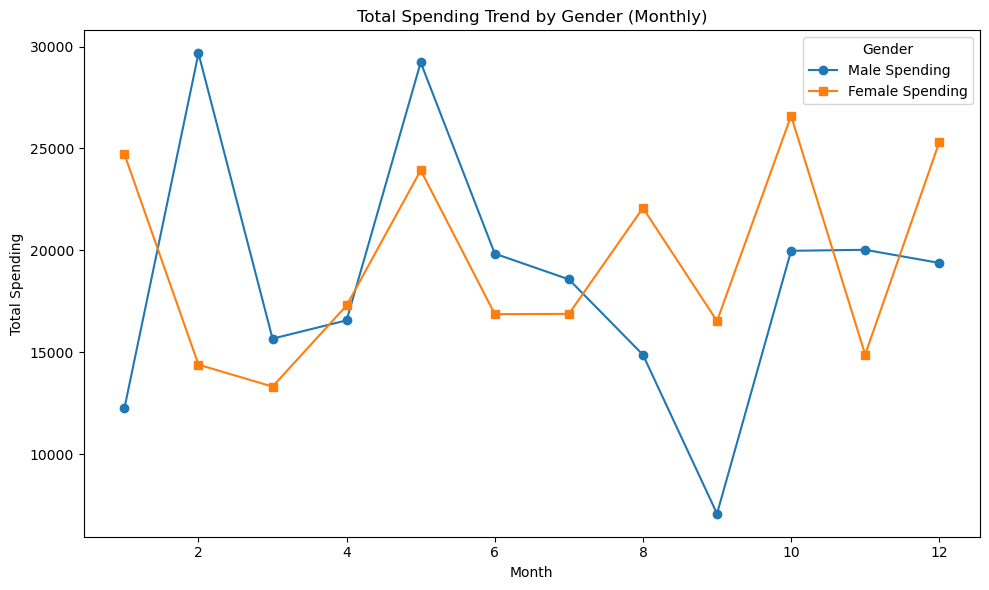

In [19]:
# Group by month (extract month from 'Date' column)
monthly_transactions = df.groupby(df['Date'].dt.month)


def calculate_gender_spending(group):
  """Calculates total spending for male and female customers within a group."""
  male_spending = group[group['Gender'] == 'Male']['Total Amount'].sum()
  female_spending = group[group['Gender'] == 'Female']['Total Amount'].sum()
  return pd.Series({'Male': male_spending, 'Female': female_spending})


# Apply the function to each group and store the result
gendered_spending = monthly_transactions.apply(calculate_gender_spending)

# Print results 
for month, gender_data in gendered_spending.iterrows():
  print(f"Month: {month}")
  print(f"  Male Spending: {gender_data['Male']:.2f}")
  print(f"  Female Spending: {gender_data['Female']:.2f}")
  print()  # Add a blank line between months

# Extract month labels and sales data
months = gendered_spending.index.to_list()
male_spending = gendered_spending['Male'].to_list()
female_spending = gendered_spending['Female'].to_list()

# Create the Lineplot
plt.figure(figsize=(10, 6))  
plt.plot(months, male_spending, marker='o', label='Male Spending')
plt.plot(months, female_spending, marker='s', label='Female Spending')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.legend(title = 'Gender')
plt.title('Total Spending Trend by Gender (Monthly)')
plt.tight_layout()
plt.show()

Visualizing Gender-Based Spending Trend:

The table and line plot enable direct comparison of monthly spending patterns between genders over the year.

Key fluctuations emerge:

* Peak Male spending occurs in May ($29,220)

* Peak Female spending arrives in October ($26,600)

Both lines reveal distinct seasonal purchasing behaviors, with neither gender maintaining consistent monthly expenditure.

# Conclusion 
This retail sales analysis uncovered three fundamental consumer behavior patterns:

1. Gender-Driven Purchasing

* Spending gaps vary by product category (e.g., males dominate Electronics, females lead Beauty)
* Notable exceptions in balanced categories like Clothing

2. Age-Based Preferences

* Younger consumers (18-25) prefer Beauty/Clothing
* Older demographics (30+) focus on Electronics
* Critical inflection points at ages 22 and 30

3. Predictable Seasonality

* May and Q4 (Oct-Dec) are revenue peaks (+42% vs average)
* September’s slump (−23%) demands intervention
* Monthly trends enable:

  Just-in-time inventory planning
  Targeted promotional calendars

Strategic Value: These insights create a framework for:
* Dynamic pricing models
* Hyper-targeted marketing campaigns
* Data-driven inventory allocation